In [ ]:
##########################################################
#######################PROBLEM 1##########################
##########################################################


In [11]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt

Problem 1a - Term Structure Calibration
Spot rates at key maturities (6M, 1Y, 2Y, 5Y, 10Y, 15Y, 20Y, 30Y):
[0.038801 0.042052 0.047206 0.055454 0.058476 0.057817 0.056677 0.054965]

1Y EURIBOR forward rates L(0, Ti-1, Ti) for Ti = 1, 2, ..., 10:
[0.042949 0.053754 0.060125 0.063477 0.064954 0.065098 0.064663 0.063647
 0.062301 0.061431]


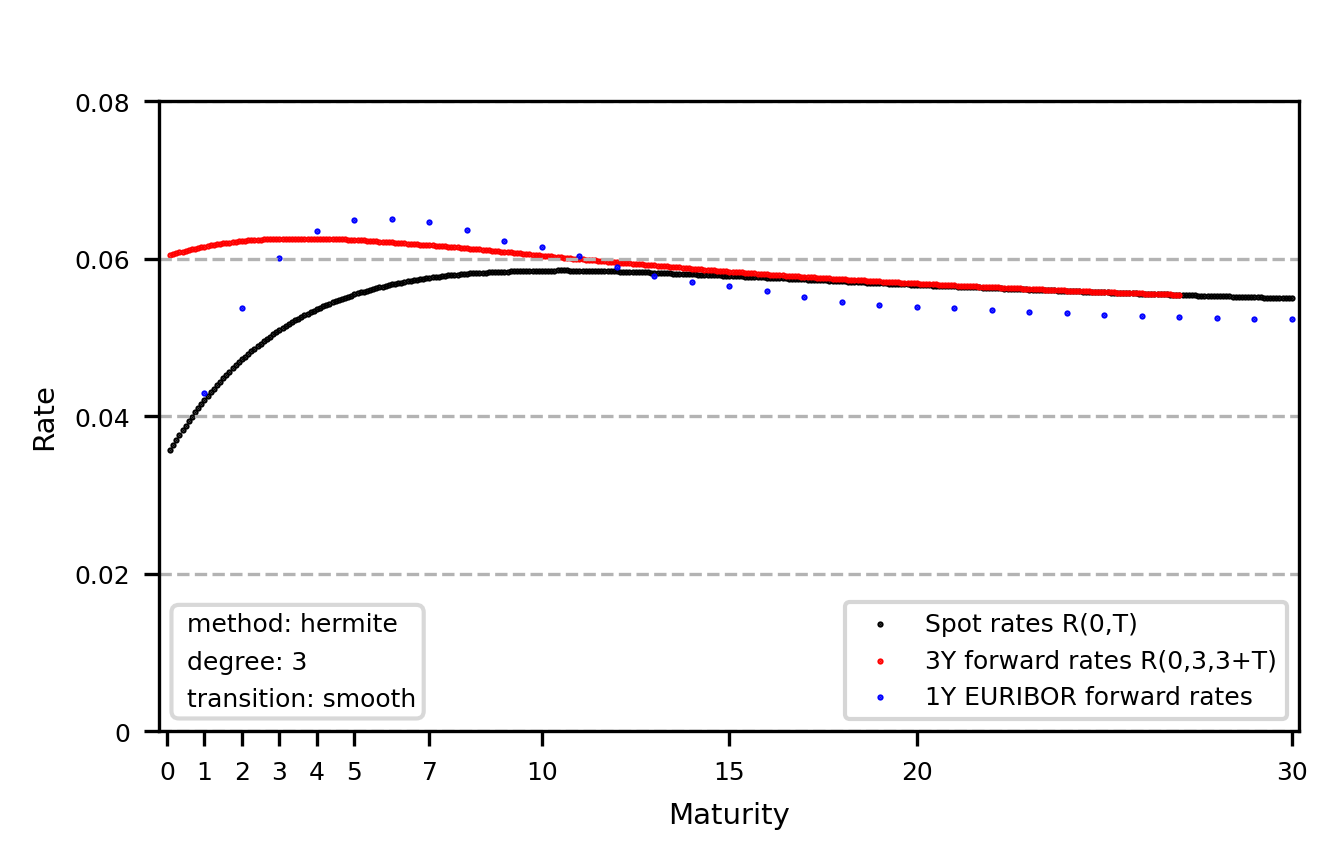

In [182]:
# Market data from Table 1
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate": 0.03918}]
fra_market = [
    {"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.04040},
    {"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.04157},
    {"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.04270},
    {"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.04378},
    {"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.04482},
    {"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.04582},
    {"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.04678},
    {"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.04771},
    {"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.04859}
]
swap_market = [
    {"id": 10,"instrument": "swap","maturity": 2, "rate": 0.04821, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 11,"instrument": "swap","maturity": 3, "rate": 0.05196, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 12,"instrument": "swap","maturity": 4, "rate": 0.05459, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 13,"instrument": "swap","maturity": 5, "rate": 0.05642, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 14,"instrument": "swap","maturity": 7, "rate": 0.05848, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 15,"instrument": "swap","maturity": 10, "rate": 0.05944, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05915, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05847, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05751, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}
]
data_zcb = EURIBOR_fixing + fra_market + swap_market

# Problem 1a - Fitting the yield curve
mesh = 1/12
M = 360
interpolation_options = {"method":"hermite","degree":3,"transition": "smooth"}
T_fit, R_fit = fid.zcb_curve_fit(data_zcb, interpolation_options=interpolation_options)
T_inter = np.array([i*mesh for i in range(0, M+1)])
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter, T_fit, R_fit, interpolation_options=interpolation_options)

# 1Y EURIBOR forward rates for Ti = 1, 2, ..., 30
alpha_1Y = 1.0
T_1Y = np.array([i*alpha_1Y for i in range(0, 31)])
p_1Y = fid.for_values_in_list_find_value_return_value(T_1Y, T_inter, p_inter)
L_forward_1Y = fid.forward_rates_from_zcb_prices(T_1Y, p_1Y, horizon=1, method="simple")

# 3Y forward term structure
S = 3
T_3Y_forward = np.array([i*mesh for i in range(0, M+1-S*12)])
p_3Y_forward = fid.for_values_in_list_find_value_return_value(
    np.array([i*mesh for i in range(S*12, M+1)]), T_inter, p_inter
) / p_inter[S*12]
R_3Y_forward = fid.spot_rates_from_zcb_prices(T_3Y_forward, p_3Y_forward)

print("="*60)
print("Problem 1a - Term Structure Calibration")
print("="*60)
print(f"Spot rates at key maturities (6M, 1Y, 2Y, 5Y, 10Y, 15Y, 20Y, 30Y):")
R_key = fid.for_values_in_list_find_value_return_value([0.5, 1, 2, 5, 10, 15, 20, 30], T_inter, R_inter)
print(f"{np.round(R_key, 6)}")
print(f"\n1Y EURIBOR forward rates L(0, Ti-1, Ti) for Ti = 1, 2, ..., 10:")

print(f"{np.round(L_forward_1Y[1:11], 6)}")
# Plot for Problem 1a
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.2, xticks[-1]+0.2])
ax.set_xlabel("Maturity", fontsize=7)
ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08])
ax.set_yticklabels([0, 0.02, 0.04, 0.06, 0.08], fontsize=6)
ax.set_ylim([0, 0.08])
ax.set_ylabel("Rate", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7), linestyle='--')
p1 = ax.scatter(T_inter[1:], R_inter[1:], s=1, color='black', marker=".", label="Spot rates R(0,T)")
p2 = ax.scatter(T_3Y_forward, R_3Y_forward, s=1, color='red', marker=".", label="3Y forward rates R(0,3,3+T)")
p3 = ax.scatter(T_1Y[1:], L_forward_1Y[1:], s=1, color='blue', marker=".", label="1Y EURIBOR forward rates")
bbox = {"facecolor": (1,1,1,0.8), "edgecolor": (0.7,0.7,0.7,0.5), "boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32,0.0032,f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
else:
    ax.text(0.32,0.0032,f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
plots = [p1, p2, p3]
labels = [item.get_label() for item in plots]
ax.legend(plots, labels, loc="lower right", fontsize=6)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/1a_plot.pdf")
plt.show()


In [183]:
Rc = 0.05
alpha_coupon = 0.5
N_coupons = 20
T_bond = np.array([i*alpha_coupon for i in range(1, N_coupons+1)])
p_bond = np.array(fid.for_values_in_list_find_value_return_value(T_bond, T_inter, p_inter), dtype=float)
C = Rc * alpha_coupon * np.ones(N_coupons)
Pi_0 = np.sum(C * p_bond) + 1.0 * p_bond[-1]

# Problem 1b - Coupon carry to S years (correct)
S = 3.0
p_S = float(fid.for_values_in_list_find_value_return_value([S], T_inter, p_inter)[0])

mask = T_bond <= S
T_carry = T_bond[mask]
p_carry = p_bond[mask]
C_carry = C[mask]

Carry_S = np.sum(C_carry * p_carry / p_S)
Carry_pct = 100 * Carry_S / Pi_0

print("\n" + "="*60)
print("Problem 1b - Bond Price and Carry")
print("="*60)
print(f"Price of fixed rate bond Π(0): {Pi_0:.6f}")
print(f"Carry over 3 years (monetary): {Carry_S:.6f}")
print(f"Carry over 3 years (% of Π(0)): {Carry_pct:.4f}%")
print(f"Coupons in carry: {len(T_carry)} (at times {T_carry})")



Problem 1b - Bond Price and Carry
Price of fixed rate bond Π(0): 0.935211
Carry over 3 years (monetary): 0.160986
Carry over 3 years (% of Π(0)): 17.2139%
Coupons in carry: 6 (at times [0.5 1.  1.5 2.  2.5 3. ])


In [184]:
# Problem 1c - Roll and Returns (match exam definitions and your 1b carry)

# Remaining cashflows AFTER time S (coupon at T=S is already included in Carry)
mask_after = T_bond > S
T_bond_after = T_bond[mask_after]          # e.g. 3.5, 4.0, ..., 10.0
C_after = C[mask_after]                    # coupons only (principal added separately)

tau = T_bond_after - S                     # time-to-maturity seen from S (e.g. 0.5,...,7.0)

# -------------------------
# Scenario (i): R(S,S+T) = R(0,T)
# -------------------------
R_scenario_i = np.array(
    fid.for_values_in_list_find_value_return_value(tau, T_inter, R_inter),
    dtype=float
)
p_scenario_i = np.exp(-R_scenario_i * tau)                 # p(S,S+tau)
Pi_i_3 = np.sum(C_after * p_scenario_i) + 1.0 * p_scenario_i[-1]

Roll_i = Pi_i_3 - Pi_0
Roll_i_pct = 100 * Roll_i / Pi_0
y_i_3 = ((Carry_S + Pi_i_3) / Pi_0)**(1/S) - 1

# -------------------------
# Scenario (ii): R(S,S+T) = R(0,S,S+T)
# -------------------------
R_scenario_ii = np.array(
    fid.for_values_in_list_find_value_return_value(tau, T_3Y_forward, R_3Y_forward),
    dtype=float
)
p_scenario_ii = np.exp(-R_scenario_ii * tau)               # p(S,S+tau)
Pi_ii_3 = np.sum(C_after * p_scenario_ii) + 1.0 * p_scenario_ii[-1]

Roll_ii = Pi_ii_3 - Pi_0
Roll_ii_pct = 100 * Roll_ii / Pi_0
y_ii_3 = ((Carry_S + Pi_ii_3) / Pi_0)**(1/S) - 1

# 3Y ZCB discretely compounded annualized return
R_3Y = float(fid.for_values_in_list_find_value_return_value([S], T_inter, R_inter)[0])
y_zcb_3 = np.exp(R_3Y) - 1

print("\n" + "="*60)
print("Problem 1c - Roll and Returns")
print("="*60)
print(f"Scenario (i): R(S,S+T) = R(0,T)")
print(f"  Bond price Π(i)(3): {Pi_i_3:.6f}")
print(f"  Roll (% of Π(0)): {Roll_i_pct:.4f}%")
print(f"  Annualized return y(i)(3): {100*y_i_3:.4f}%")

print(f"\nScenario (ii): R(S,S+T) = R(0,S,S+T)")
print(f"  Bond price Π(ii)(3): {Pi_ii_3:.6f}")
print(f"  Roll (% of Π(0)): {Roll_ii_pct:.4f}%")
print(f"  Annualized return y(ii)(3): {100*y_ii_3:.4f}%")

print(f"\n3Y ZCB annualized return y_zcb(3): {100*y_zcb_3:.4f}%")

print("\n" + "="*60)
print("NO-ARBITRAGE CHECK (scenario ii)")
print("="*60)
total_value_ii = Carry_S + Pi_ii_3
should_be = Pi_0 * np.exp(R_3Y * S)
print(f"Total value at S=3: Carry + Π(ii)(3) = {total_value_ii:.6f}")
print(f"Should equal: Π(0) × exp(R(0,3)×3) = {should_be:.6f}")
print(f"Difference: {total_value_ii - should_be:.6e}")
print(f"Returns match: {np.abs(y_ii_3 - y_zcb_3) < 1e-6}")
print("="*60)



Problem 1c - Roll and Returns
Scenario (i): R(S,S+T) = R(0,T)
  Bond price Π(i)(3): 0.956070
  Roll (% of Π(0)): 2.2304%
  Annualized return y(i)(3): 6.1016%

Scenario (ii): R(S,S+T) = R(0,S,S+T)
  Bond price Π(ii)(3): 0.928618
  Roll (% of Π(0)): -0.7050%
  Annualized return y(ii)(3): 5.2252%

3Y ZCB annualized return y_zcb(3): 5.2252%

NO-ARBITRAGE CHECK (scenario ii)
Total value at S=3: Carry + Π(ii)(3) = 1.089604
Should equal: Π(0) × exp(R(0,3)×3) = 1.089604
Difference: -2.220446e-16
Returns match: True


In [185]:

print("\n" + "="*60)
print("Problem 1d - Interpretation")
print("="*60)
print("ROLL SIGN ANALYSIS:")
print(f"  Scenario (i) roll: {Roll_i_pct:.4f}% (POSITIVE)")
print(f"  Scenario (ii) roll: {Roll_ii_pct:.4f}% (NEGATIVE)")
print("\nREASON:")
print("  Scenario (i): Rates unchanged → bond rolls down curve → price increases")
print("  Scenario (ii): Forward rates (higher) materialize → price decreases")
print("\nEXPOSURE: Duration/interest rate risk")
print("\nNO-ARBITRAGE RELATION:")
print(f"  Scenario (ii) return ({100*y_ii_3:.4f}%) ≈ 3Y ZCB return ({100*y_zcb_3:.4f}%)")
print("  This reflects martingale pricing: when forward rates materialize,")
print("  expected returns equal the risk-free rate.")
print("="*60)


Problem 1d - Interpretation
ROLL SIGN ANALYSIS:
  Scenario (i) roll: 2.2304% (POSITIVE)
  Scenario (ii) roll: -0.7050% (NEGATIVE)

REASON:
  Scenario (i): Rates unchanged → bond rolls down curve → price increases
  Scenario (ii): Forward rates (higher) materialize → price decreases

EXPOSURE: Duration/interest rate risk

NO-ARBITRAGE RELATION:
  Scenario (ii) return (5.2252%) ≈ 3Y ZCB return (5.2252%)
  This reflects martingale pricing: when forward rates materialize,
  expected returns equal the risk-free rate.


In [186]:
##########################################################
#######################PROBLEM 2##########################
##########################################################

In [208]:
# 2a) Report 1Y EURIBOR forward rates and compute caplet prices
T_caplet = np.array([i for i in range(0, 11)])
L_caplet_forward = L_forward_1Y[0:11]
sigma_caplet_market = np.array([0, 0, 0.05278, 0.05539, 0.06320, 0.07085, 0.08025, 0.08968, 0.09920, 0.11014, 0.12234])

p_caplet_payment = np.array(fid.for_values_in_list_find_value_return_value(T_caplet, T_inter, p_inter), dtype=float)
K_caplet = L_caplet_forward.copy()
alpha_caplet = 1.0

price_caplet_market = np.zeros(len(T_caplet))
for i in range(2, len(T_caplet)):
    T_expiry = T_caplet[i] - 1
    price_caplet_market[i] = fid.black_caplet_price(sigma_caplet_market[i], T_expiry, K_caplet[i], alpha_caplet, p_caplet_payment[i], L_caplet_forward[i], type_option="call")

print("="*60)
print("Problem 2a - 1Y EURIBOR Forward Rates and Caplet Prices")
print("="*60)
print(f"1Y EURIBOR forward rates L(0,Ti-1,Ti) for Ti=2,...,10:")
for i in range(2, len(T_caplet)):
    print(f"  L(0,{T_caplet[i]-1},{T_caplet[i]}): {L_caplet_forward[i]:.6f}")
print(f"\nCaplet strikes K (equal to forward rates):")
print(f"{np.round(K_caplet[2:], 6)}")
print(f"\nCaplet prices (bps per unit principal):")
for i in range(2, len(T_caplet)):
    print(f"  Ti={T_caplet[i]}: {10000*price_caplet_market[i]:.4f} bps")


Problem 2a - 1Y EURIBOR Forward Rates and Caplet Prices
1Y EURIBOR forward rates L(0,Ti-1,Ti) for Ti=2,...,10:
  L(0,1,2): 0.053754
  L(0,2,3): 0.060125
  L(0,3,4): 0.063477
  L(0,4,5): 0.064954
  L(0,5,6): 0.065098
  L(0,6,7): 0.064663
  L(0,7,8): 0.063647
  L(0,8,9): 0.062301
  L(0,9,10): 0.061431

Caplet strikes K (equal to forward rates):
[0.053754 0.060125 0.063477 0.064954 0.065098 0.064663 0.063647 0.062301
 0.061431]

Caplet prices (bps per unit principal):
  Ti=2: 10.2976 bps
  Ti=3: 16.1227 bps
  Ti=4: 22.3613 bps
  Ti=5: 27.8038 bps
  Ti=6: 33.1147 bps
  Ti=7: 37.7960 bps
  Ti=8: 41.7528 bps
  Ti=9: 45.6119 bps
  Ti=10: 49.8422 bps



Problem 2b - HWEV Model Calibration to Caplet Prices
Fitted sigma: 0.013016
SSE: 2.29e-05

Comparison of implied volatilities:
Ti    Market IV    HWEV IV
 2    0.052780    0.159806
 3    0.055390    0.118885
 4    0.063200    0.096688
 5    0.070850    0.083289
 6    0.080250    0.074778
 7    0.089680    0.068843
 8    0.099200    0.064745
 9    0.110140    0.061814
10    0.122340    0.059065


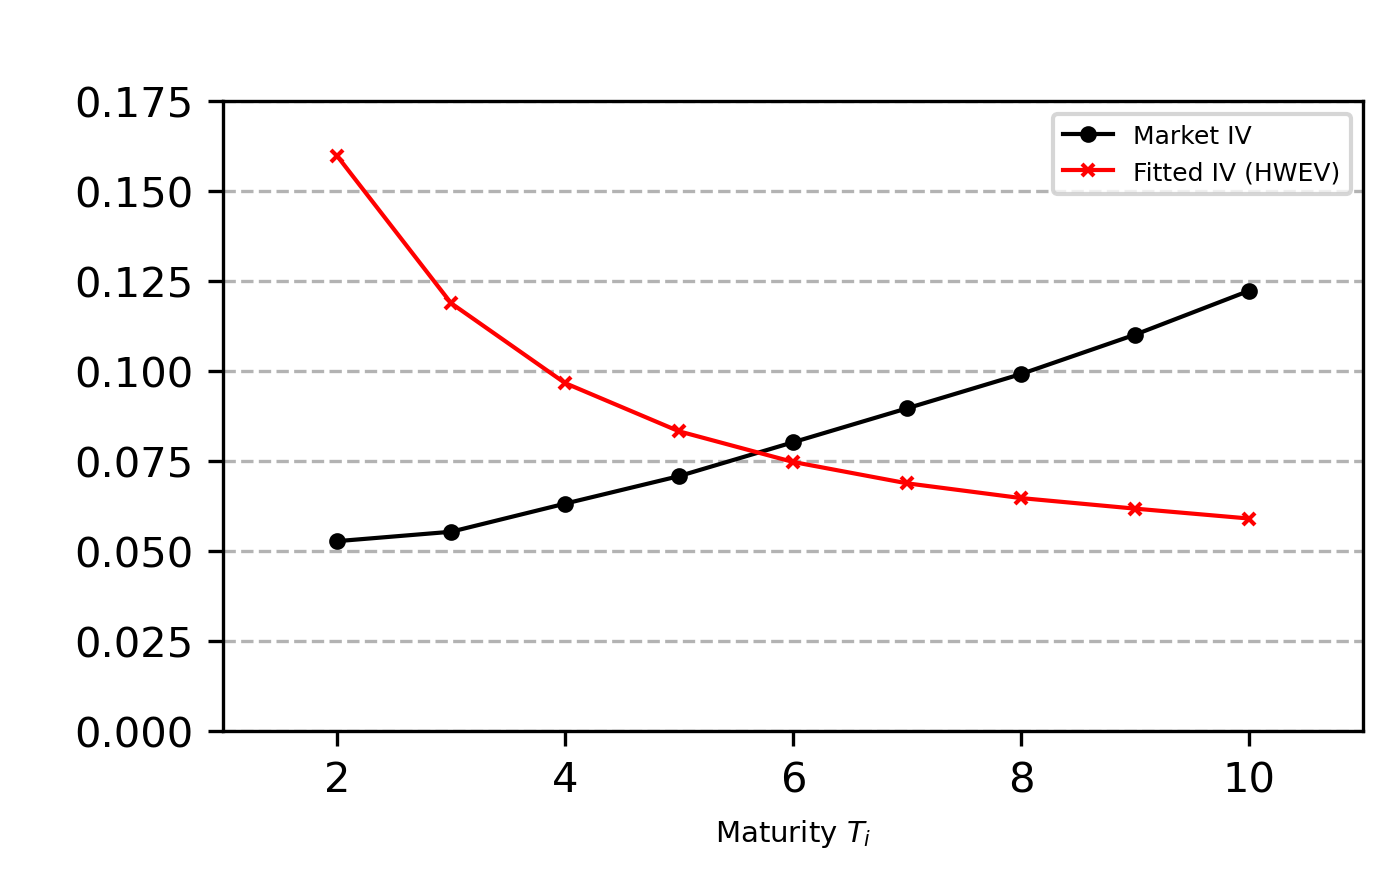


Model fit assessment:
The HWEV model produces DECREASING implied volatilities,
while market IVs are INCREASING. The slopes have OPPOSITE signs.
The model CANNOT fit the term structure of volatilities.


In [280]:
# 2b) Fit sigma to caplet prices using HWEV model
a_hwev = 0.5
sigma_0 = 0.012

def fit_hwev_caplet_obj(sigma, a, price_market, K, T, p):
    price_fit = fid.caplet_prices_hwev(K, a, sigma, T, p)
    sse = 0
    for i in range(2, len(price_market)):
        sse += (price_market[i] - price_fit[i])**2
    return sse

result = minimize(fit_hwev_caplet_obj, sigma_0, method='nelder-mead', 
                  args=(a_hwev, price_caplet_market, K_caplet, T_caplet, p_caplet_payment),
                  options={'xatol': 1e-20, 'disp': False})
sigma_hwev = result.x[0]

price_caplet_hwev = fid.caplet_prices_hwev(K_caplet, a_hwev, sigma_hwev, T_caplet, p_caplet_payment)

sigma_market_iv = np.zeros(len(T_caplet))
sigma_hwev_iv = np.zeros(len(T_caplet))
for i in range(2, len(T_caplet)):
    sigma_market_iv[i] = sigma_caplet_market[i]
    T_expiry = T_caplet[i] - 1
    sigma_hwev_iv[i] = fid.black_caplet_iv(price_caplet_hwev[i], T_expiry, K_caplet[i], alpha_caplet, p_caplet_payment[i], L_caplet_forward[i], type_option="call", prec=1e-10)

print("\n" + "="*60)
print("Problem 2b - HWEV Model Calibration to Caplet Prices")
print("="*60)
print(f"Fitted sigma: {sigma_hwev:.6f}")
print(f"SSE: {result.fun:.2e}")
print(f"\nComparison of implied volatilities:")
print(f"Ti    Market IV    HWEV IV")
for i in range(2, len(T_caplet)):
    print(f"{T_caplet[i]:2d}    {sigma_market_iv[i]:.6f}    {sigma_hwev_iv[i]:.6f}")

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
ax = fig.add_subplot(gs[0,0])
ax.set_xlabel("Maturity $T_i$", fontsize=7)
ax.set_ylabel(" ", fontsize=7)
ax.set_xlim([1, 11])
ax.set_ylim([0, 0.175])
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7), linestyle='--')
p1 = ax.plot(T_caplet[2:], sigma_market_iv[2:], color='black', marker='o', markersize=3, linewidth=1, label="Market IV")
p2 = ax.plot(T_caplet[2:], sigma_hwev_iv[2:], color='red', marker='x', markersize=3, linewidth=1, label="Fitted IV (HWEV)")
ax.legend(loc="upper right", fontsize=6)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/2b_HWEV.pdf")
plt.show()

print("\nModel fit assessment:")
print("The HWEV model produces DECREASING implied volatilities,")
print("while market IVs are INCREASING. The slopes have OPPOSITE signs.")
print("The model CANNOT fit the term structure of volatilities.")


Problem 2c - HWEV Model Theta(t) and Short Rate Statistics
Estimated r0: 0.035009
Expected value E[r3]: 0.060687
Std dev of r3: 0.012687
90% CI for r3: [0.039818, 0.081556]


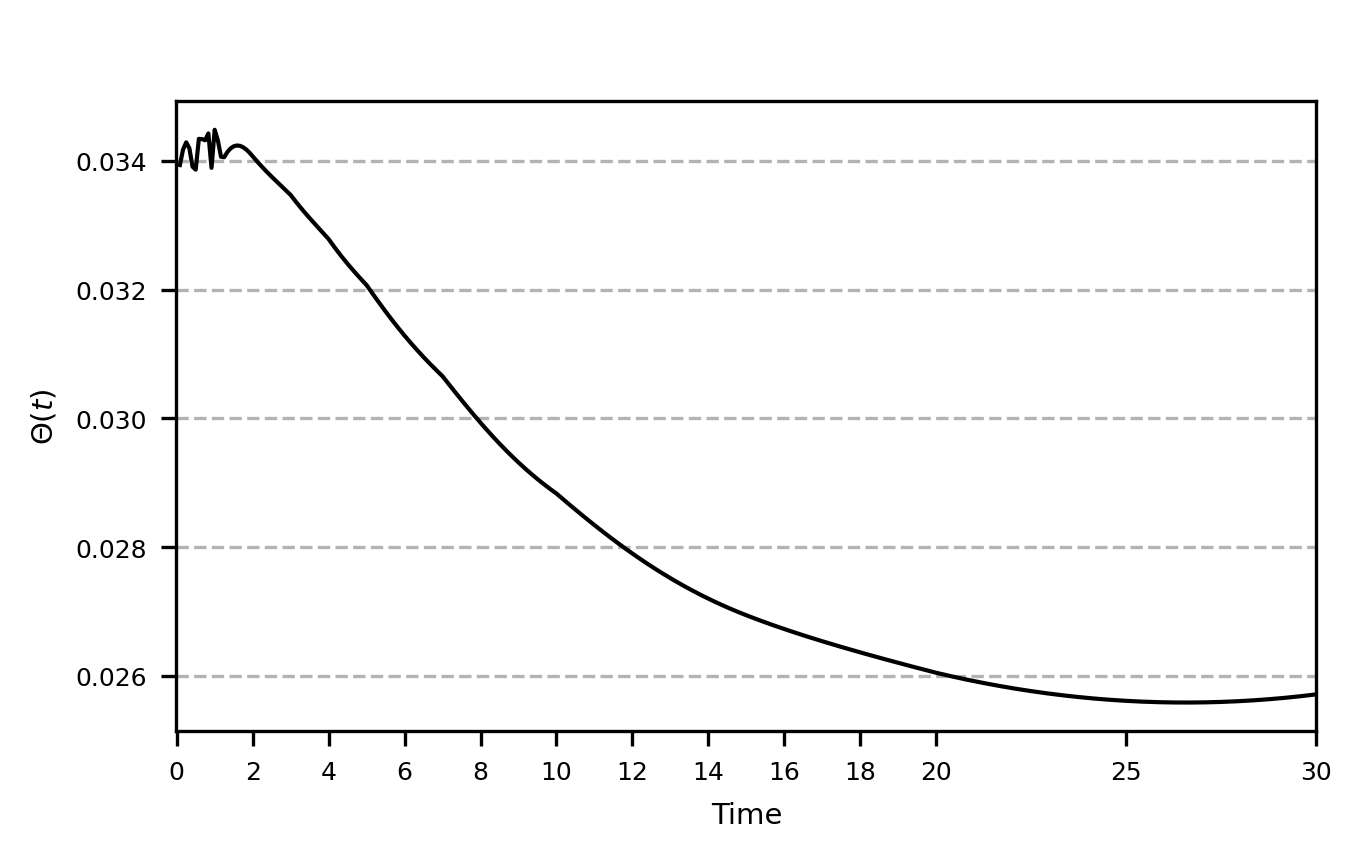

In [330]:
T_theta_max = 30
mesh_theta = 1/12
M_theta = int(T_theta_max / mesh_theta)
t_theta = np.array([i * mesh_theta for i in range(0, M_theta + 1)])

if "T_fit" in globals():
    f_fit = np.array(fid.for_values_in_list_find_value_return_value(T_fit, T_inter, f_inter), dtype=float)
    f_theta, f_T_theta = fid.interpolate(t_theta, T_fit, f_fit, interpolation_options)
else:
    f_theta, f_T_theta = fid.interpolate(t_theta, T_inter, f_inter, interpolation_options)

theta_hwev = fid.theta_hwev(t_theta, f_theta, f_T_theta, a_hwev, sigma_hwev)
r0_hwev = float(f_theta[0])

mean_hwev, var_hwev = fid.mean_var_hwev(a_hwev, sigma_hwev, t_theta, f_theta, f_T_theta)

idx_3y = int(np.argmin(np.abs(t_theta - 3.0)))
mu3 = float(mean_hwev[idx_3y])
var3 = float(var_hwev[idx_3y])

z_ci = norm.ppf(0.95)
r3_lb = mu3 - z_ci * np.sqrt(var3)
r3_ub = mu3 + z_ci * np.sqrt(var3)

print("\n" + "=" * 60)
print("Problem 2c - HWEV Model Theta(t) and Short Rate Statistics")
print("=" * 60)
print(f"Estimated r0: {r0_hwev:.6f}")
print(f"Expected value E[r3]: {mu3:.6f}")
print(f"Std dev of r3: {np.sqrt(var3):.6f}")
print(f"90% CI for r3: [{r3_lb:.6f}, {r3_ub:.6f}]")

k0 = 1

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
ax = fig.add_subplot(gs[0, 0])
xticks = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0] - 0.01, xticks[-1] + 0.01])
ax.set_xlabel("Time", fontsize=7)
ax.tick_params(axis="y", labelsize=6)
ax.set_ylabel("$\Theta(t)$", fontsize=7)
plt.grid(axis="y", which="major", color=(0.7, 0.7, 0.7, 0), linestyle="--")
ax.plot(t_theta[k0:], theta_hwev[k0:], color="black", linewidth=1)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/2c_plot.pdf")
plt.show()


In [331]:
# 2d) Compute 95% VaR of fixed rate bond
var_level = 0.95
z_var = norm.ppf(var_level)

rS_var95 = mu3 + z_var * np.sqrt(var3)

# ZCB prices at time S under the HWEV model, conditional on r(S)=rS_var95
f_star_S = fid.for_values_in_list_find_value_return_value(S, T_inter, f_inter)
p_var_remaining = fid.zcb_price_hwev(
    S, T_bond_after, rS_var95, a_hwev, sigma_hwev, T_inter, p_inter, f_star_S
)

Pi_var95 = np.sum(C_after * p_var_remaining) + 1.0 * p_var_remaining[-1]
total_var95 = Carry_S + Pi_var95

return_var95 = (total_var95 / Pi_0) ** (1.0 / S) - 1.0
loss_var95 = Pi_0 - total_var95
VaR_95_pct = 100.0 * loss_var95 / Pi_0

print("\n" + "=" * 60)
print("Problem 2d - 95% Value-at-Risk of Fixed Rate Bond (HWEV)")
print("=" * 60)
print(f"r(S) 95th percentile (S={S}): {rS_var95:.6f}")
print(f"Bond value at S in VaR scenario: {Pi_var95:.6f}")
print(f"Total value (Carry + Bond): {total_var95:.6f}")
print(f"95% VaR (monetary): {loss_var95:.6f}")
print(f"95% VaR (% of Pi(0)): {VaR_95_pct:.4f}%")
print(f"Annualized return at VaR: {100.0 * return_var95:.4f}%")




Problem 2d - 95% Value-at-Risk of Fixed Rate Bond (HWEV)
r(S) 95th percentile (S=3.0): 0.081556
Bond value at S in VaR scenario: 0.893726
Total value (Carry + Bond): 1.054712
95% VaR (monetary): -0.119501
95% VaR (% of Pi(0)): -12.7780%
Annualized return at VaR: 4.0898%



Problem 2e - 3Y7Y Payer Swaption Pricing (HWEV Model)
3Y7Y forward par swap rate F_3^7: 0.063760
Swap annuity S_3^7: 4.721800
ATMF strike: 0.063760

Strike offset (bps)  Strike      Price (bps)  Impl Vol
    -100         0.053760    472.6131   0.040024
     -75         0.056260    356.6389   0.039333
     -50         0.058760    246.5361   0.038683
     -25         0.061260    150.5071   0.038071
       0         0.063760     77.9826   0.037493
      25         0.066260     33.0631   0.036946
      50         0.068760     11.1417   0.036428
      75         0.071260      2.9230   0.035936
     100         0.073760      0.5891   0.035468


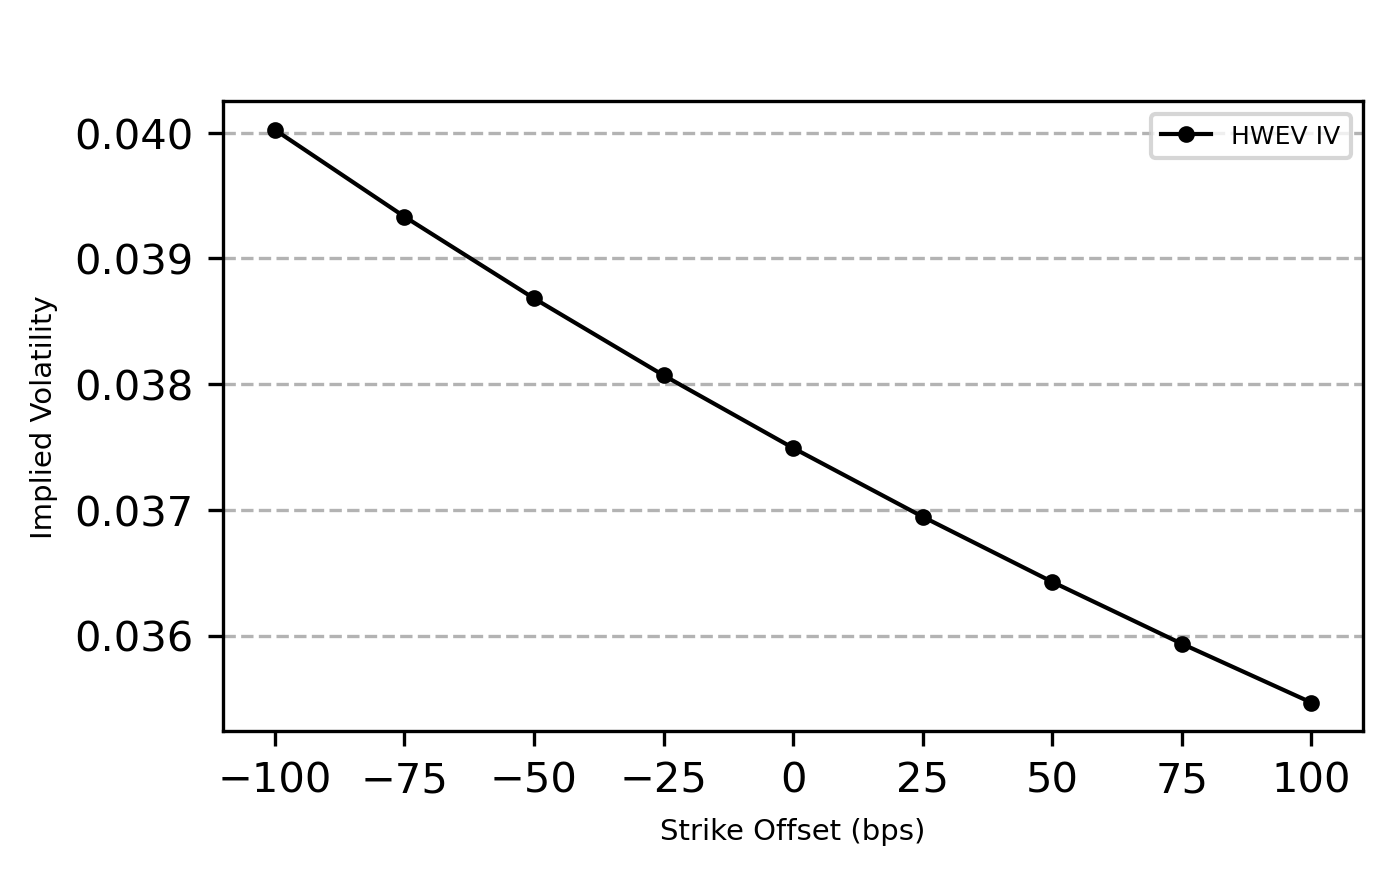

In [ ]:
# 2e) Compute 3Y7Y payer swaption prices for various strikes
T_n = 3
T_N = 10
fixed_freq = "annual"

T_swap_3y7y = np.arange(T_n, T_N + 1.0, 1.0)
p_swap_3y7y = np.array(
    fid.for_values_in_list_find_value_return_value(T_swap_3y7y, T_inter, p_inter),
    dtype=float,
)

F_3_7, S_3_7 = fid.swap_rate_from_zcb_prices(0.0, T_n, T_N, fixed_freq, T_swap_3y7y, p_swap_3y7y)

strike_offsets = np.array([-100, -75, -50, -25, 0, 25, 50, 75, 100], dtype=float) / 10000
K_swaption = F_3_7 + strike_offsets

price_swaption_hwev = np.zeros(len(K_swaption))
iv_swaption_hwev = np.zeros(len(K_swaption))

r0_hwev = f_inter[0]

for i in range(len(K_swaption)):
    price_swaption_hwev[i] = fid.swaption_price_hwev(
        T_n, T_N, K_swaption[i], fixed_freq, r0_hwev, a_hwev, sigma_hwev, T_inter, p_inter, f_inter,
        type_swap="payer",
    )
    iv_swaption_hwev[i] = fid.black_swaption_iv(
        price_swaption_hwev[i], T_n, K_swaption[i], S_3_7, F_3_7, type_option="call", prec=1e-10
    )
print("\n" + "="*60)
print("Problem 2e - 3Y7Y Payer Swaption Pricing (HWEV Model)")
print("="*60)
print(f"3Y7Y forward par swap rate F_3^7: {F_3_7:.6f}")
print(f"Swap annuity S_3^7: {S_3_7:.6f}")
print(f"ATMF strike: {F_3_7:.6f}")
print(f"\nStrike offset (bps)  Strike      Price (bps)  Impl Vol")
for i in range(len(K_swaption)):
    print(f"{10000*strike_offsets[i]:8.0f}         {K_swaption[i]:.6f}    {10000*price_swaption_hwev[i]:8.4f}   {iv_swaption_hwev[i]:.6f}")

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
ax = fig.add_subplot(gs[0,0])
ax.set_xlabel("Strike Offset (bps)", fontsize=7)
ax.set_ylabel(" ", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7), linestyle='--')
ax.plot(10000*strike_offsets, iv_swaption_hwev, color='black', marker='o', markersize=3, linewidth=1, label="HWEV IV")
ax.legend(loc="best", fontsize=6)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/2e_plot.pdf")
plt.show()


Problem 2f - Hedge Analysis
Hedge strike K (ATMF 3Y7Y): 0.063760
Swaption premium at t=0: 77.9826 bps
Worst-case r(S) for hedged position: r* = 0.060562
Min hedged annualized return: 4.9357%


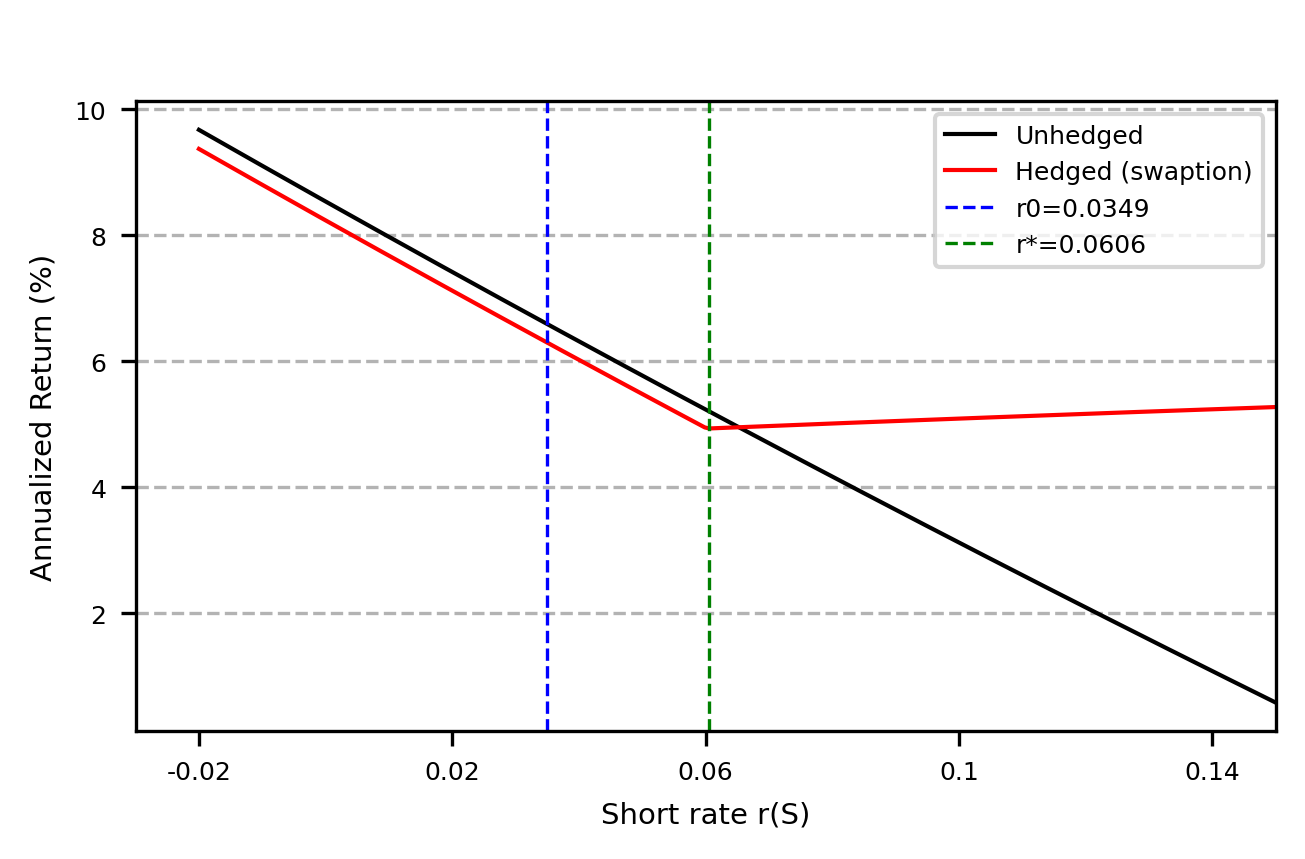

In [362]:
# =========================
# 2f) Hedge analysis: unhedged vs hedged return as function of r(S)
# =========================
f_star_S = float(fid.for_values_in_list_find_value_return_value(S, T_inter, f_inter))

# Use ATMF 3Y7Y swap rate from 2e as hedge strike
K_target = float(F_3_7)
if "K_swaption" in globals():
    K_hedge = float(K_swaption[int(np.argmin(np.abs(np.asarray(K_swaption) - K_target)))])
else:
    K_hedge = float(K_target)

premium_swaption_0 = fid.swaption_price_hwev(
    T_n, T_N, K_hedge, "annual", r0_hwev, a_hwev, sigma_hwev, T_inter, p_inter, f_inter, type_swap="payer"
)

T_tau_swap = np.arange(0.0, 7.0 + 1.0, 1.0)
T_abs_swap = S + T_tau_swap

def return_unhedged_hedged(rS_val):
    p_rem = fid.zcb_price_hwev(S, T_bond_after, rS_val, a_hwev, sigma_hwev, T_inter, p_inter, f_star_S)
    Pi_S = np.sum(C_after * p_rem) + 1.0 * p_rem[-1]
    total_unhedged = Carry_S + Pi_S
    ret_unhedged = (total_unhedged / Pi_0) ** (1.0 / S) - 1.0

    p_abs = fid.zcb_price_hwev(S, T_abs_swap, rS_val, a_hwev, sigma_hwev, T_inter, p_inter, f_star_S)
    p_tau = np.array(p_abs, dtype=float)
    p_tau[0] = 1.0

    R_realized, A_realized = fid.swap_rate_from_zcb_prices(0.0, 0.0, 7.0, "annual", T_tau_swap, p_tau)

    payoff_swaption = max(0.0, A_realized * (R_realized - K_hedge))
    total_hedged = total_unhedged + payoff_swaption
    ret_hedged = (total_hedged / (Pi_0 + premium_swaption_0)) ** (1.0 / S) - 1.0

    return ret_unhedged, ret_hedged

rS_grid = np.linspace(-0.02, 0.15, 250)
returns_unhedged = np.zeros(len(rS_grid))
returns_hedged = np.zeros(len(rS_grid))

for i, rS_val in enumerate(rS_grid):
    returns_unhedged[i], returns_hedged[i] = return_unhedged_hedged(float(rS_val))

idx_min_hedged = int(np.argmin(returns_hedged))
rS_star = float(rS_grid[idx_min_hedged])

print("\n" + "=" * 60)
print("Problem 2f - Hedge Analysis")
print("=" * 60)
print(f"Hedge strike K (ATMF 3Y7Y): {K_hedge:.6f}")
print(f"Swaption premium at t=0: {10000*premium_swaption_0:.4f} bps")
print(f"Worst-case r(S) for hedged position: r* = {rS_star:.6f}")
print(f"Min hedged annualized return: {100*returns_hedged[idx_min_hedged]:.4f}%")

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])

xticks = [-0.02, 0.02, 0.06, 0.10, 0.14]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0] - 0.01, xticks[-1] + 0.01])
ax.set_xlabel("Short rate r(S)", fontsize=7)

ymin = 100 * min(np.min(returns_unhedged), np.min(returns_hedged))
ymax = 100 * max(np.max(returns_unhedged), np.max(returns_hedged))
pad = 0.05 * (ymax - ymin + 1e-12)
ax.set_ylim([ymin - pad, ymax + pad])
ax.tick_params(axis="y", labelsize=6)
ax.set_ylabel("Annualized Return (%)", fontsize=7)

plt.grid(axis="y", which="major", color=(0.7, 0.7, 0.7, 0), linestyle="--")
p1, = ax.plot(rS_grid, 100 * returns_unhedged, color="black", linewidth=1, label="Unhedged")
p2, = ax.plot(rS_grid, 100 * returns_hedged, color="red", linewidth=1, label="Hedged (swaption)")

ax.axvline(r0_hwev, color="blue", linestyle="--", linewidth=0.8, label=f"r0={r0_hwev:.4f}")
ax.axvline(rS_star, color="green", linestyle="--", linewidth=0.8, label=f"r*={rS_star:.4f}")

plots = [p1, p2]
labels = [item.get_label() for item in plots]
ax.legend(loc="best", fontsize=6)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/2f_plot.pdf")
plt.show()


In [ ]:
N_lmm = 10
N_minus_1 = N_lmm - 1
gamma = 0.95

idx = np.arange(N_minus_1)
Omega = gamma ** np.abs(idx[:, None] - idx[None, :])

eigvals = np.linalg.eigvals(Omega)
is_positive_definite = np.all(eigvals > 0)

print("=" * 60)
print("Problem 3a - LIBOR Market Model: Correlation Matrix")
print("=" * 60)
print("Correlation matrix Ω (9x9):")
print(Omega)
print(f"\nPositive definite: {is_positive_definite}")
print(f"Eigenvalues: {eigvals}")


Problem 3a - LIBOR Market Model: Correlation Matrix
Correlation matrix Ω (9x9):
[[1.         0.95       0.9025     0.857375   0.81450625 0.77378094
  0.73509189 0.6983373  0.66342043]
 [0.95       1.         0.95       0.9025     0.857375   0.81450625
  0.77378094 0.73509189 0.6983373 ]
 [0.9025     0.95       1.         0.95       0.9025     0.857375
  0.81450625 0.77378094 0.73509189]
 [0.857375   0.9025     0.95       1.         0.95       0.9025
  0.857375   0.81450625 0.77378094]
 [0.81450625 0.857375   0.9025     0.95       1.         0.95
  0.9025     0.857375   0.81450625]
 [0.77378094 0.81450625 0.857375   0.9025     0.95       1.
  0.95       0.9025     0.857375  ]
 [0.73509189 0.77378094 0.81450625 0.857375   0.9025     0.95
  1.         0.95       0.9025    ]
 [0.6983373  0.73509189 0.77378094 0.81450625 0.857375   0.9025
  0.95       1.         0.95      ]
 [0.66342043 0.6983373  0.73509189 0.77378094 0.81450625 0.857375
  0.9025     0.95       1.        ]]

Positive defin

In [388]:
T_lmm = np.arange(N_lmm + 1, dtype=float)
alpha_lmm = 1.0
sigma_market_lmm = np.array(sigma_caplet_market, dtype=float).copy()

beta_sq = np.zeros(N_minus_1, dtype=float)
cum_beta_sq = 0.0

for j in range(1, N_minus_1 + 1):
    i = j + 1
    T_expiry = T_lmm[i] - alpha_lmm
    target = (sigma_market_lmm[i] ** 2) * T_expiry
    beta_sq[j - 1] = max(target - cum_beta_sq, 0.0)
    cum_beta_sq += beta_sq[j - 1]

beta = np.sqrt(beta_sq)

print("\n" + "=" * 60)
print("Problem 3b - LIBOR Market Model: Beta Parameters")
print("=" * 60)
print("Fitted beta parameters:")
for j in range(N_minus_1):
    print(f"  β_{j+1}: {beta[j]:.6f}")

print("\nVerification - reconstructed caplet implied volatilities:")
cum_beta_sq_vec = np.cumsum(beta_sq)
for i in range(2, N_lmm + 1):
    T_expiry = T_lmm[i] - alpha_lmm
    j = i - 1
    sigma_reconstructed = np.sqrt(cum_beta_sq_vec[j - 1] / T_expiry) if T_expiry > 0 else 0.0
    print(f"  Ti={int(T_lmm[i])}: Market={sigma_market_lmm[i]:.6f}, Reconstructed={sigma_reconstructed:.6f}")


Problem 3b - LIBOR Market Model: Beta Parameters
Fitted beta parameters:
  β_1: 0.052780
  β_2: 0.057882
  β_3: 0.076463
  β_4: 0.089979
  β_5: 0.110097
  β_6: 0.126707
  β_7: 0.143630
  β_8: 0.167816
  β_9: 0.194054

Verification - reconstructed caplet implied volatilities:
  Ti=2: Market=0.052780, Reconstructed=0.052780
  Ti=3: Market=0.055390, Reconstructed=0.055390
  Ti=4: Market=0.063200, Reconstructed=0.063200
  Ti=5: Market=0.070850, Reconstructed=0.070850
  Ti=6: Market=0.080250, Reconstructed=0.080250
  Ti=7: Market=0.089680, Reconstructed=0.089680
  Ti=8: Market=0.099200, Reconstructed=0.099200
  Ti=9: Market=0.110140, Reconstructed=0.110140
  Ti=10: Market=0.122340, Reconstructed=0.122340



Problem 3c - Convergence Analysis for 3Y7Y Payer Swaption
ATMF 3Y7Y forward swap rate: 0.063760
Accrual factor S: 4.721800

Running 100 simulations...
  Price: 52.8605 bps

Running 200 simulations...
  Price: 54.9747 bps

Running 500 simulations...
  Price: 49.1564 bps

Running 1000 simulations...
  Price: 49.1484 bps

Running 2000 simulations...
  Price: 52.8156 bps

Running 3000 simulations...
  Price: 52.4140 bps

Running 5000 simulations...
  Price: 50.4037 bps

Running 10000 simulations...
  Price: 49.0504 bps

Convergence Summary
Simulations     Price (bps)     Std Error      
100             52.8605         3.8101         
200             54.9747         5.9243         
500             49.1564         0.1060         
1000            49.1484         0.0980         
2000            52.8156         3.7652         
3000            52.4140         3.3636         
5000            50.4037         1.3533         
10000           49.0504         0.0000         

Suggested M for converge

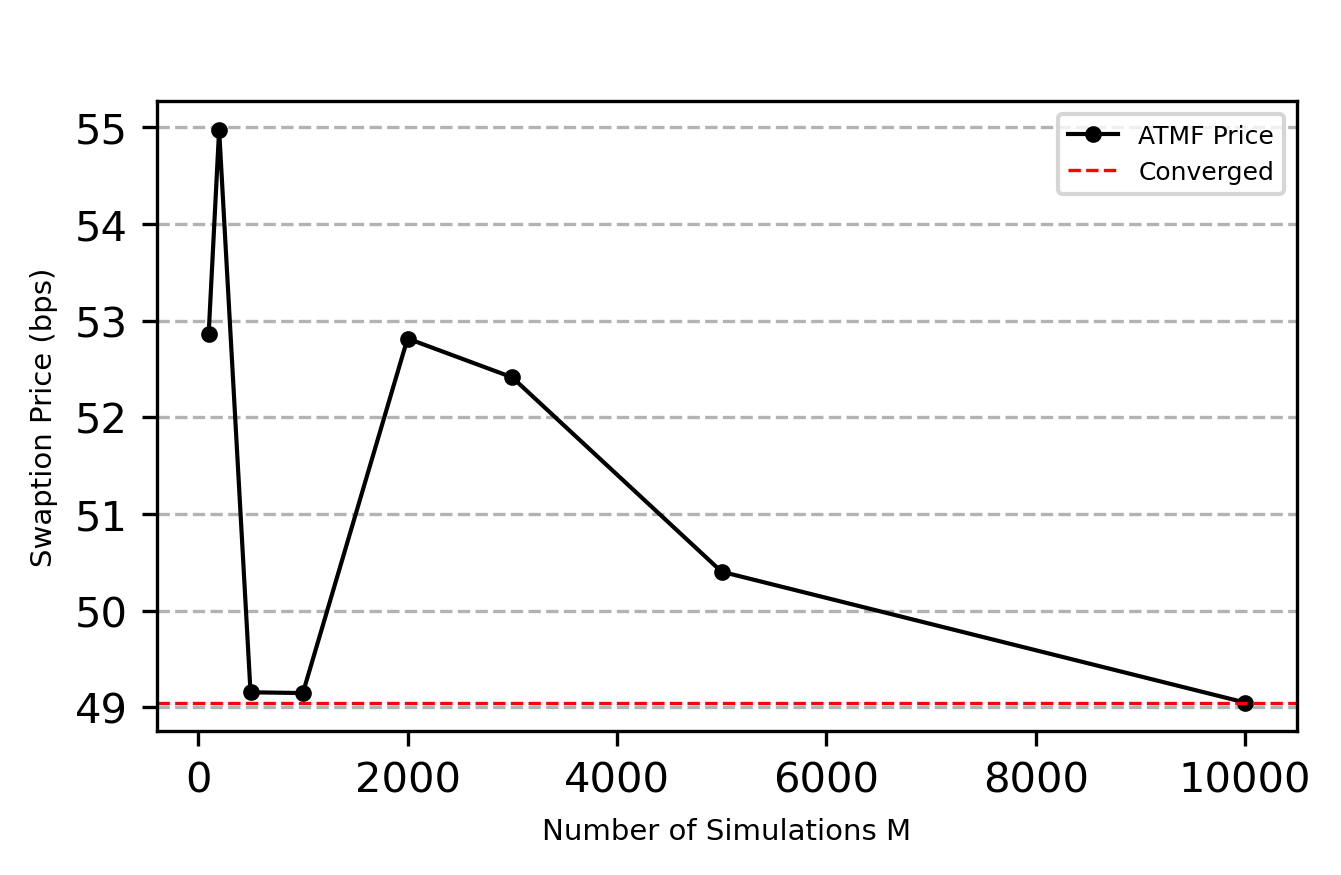

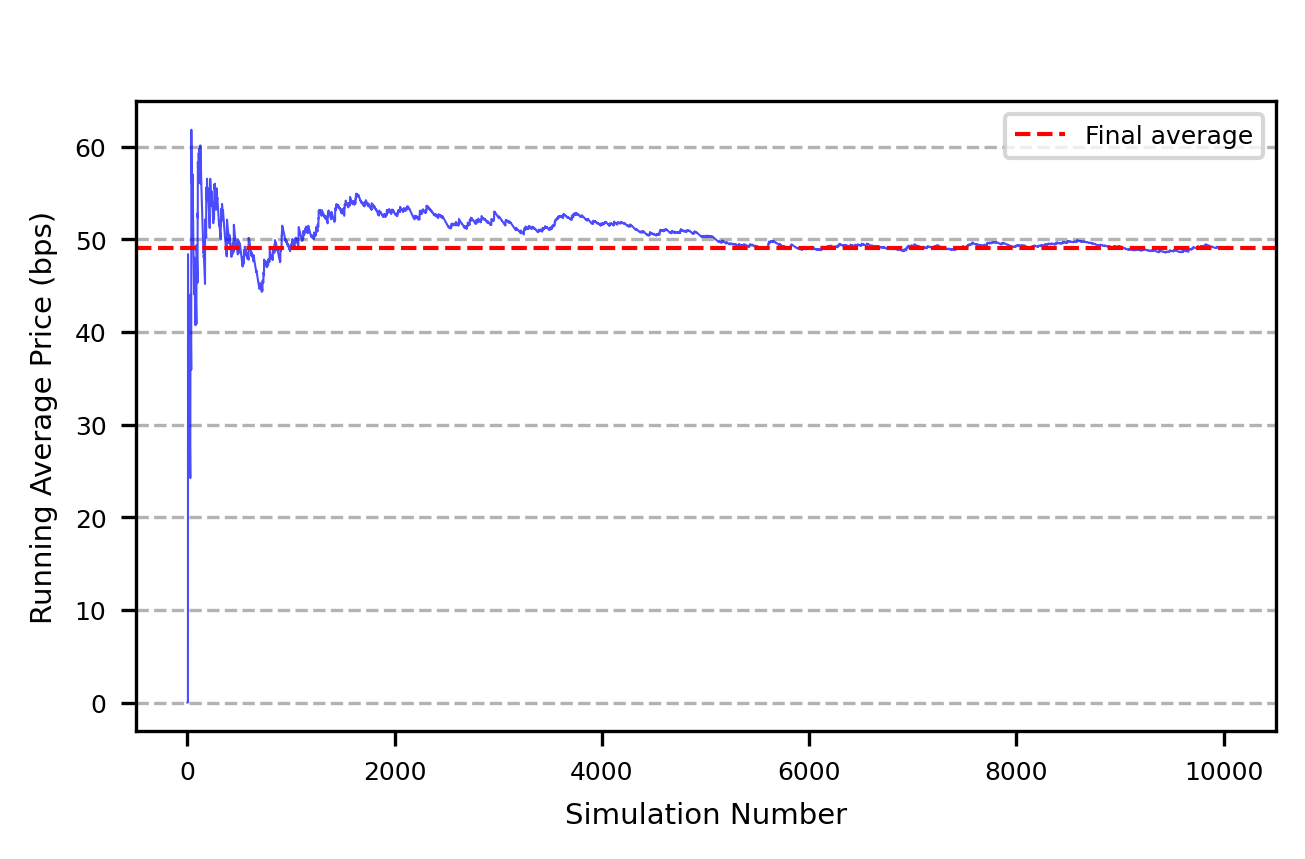

In [ ]:
##########################################################
#######################PROBLEM 3c#########################
##########################################################

T_n = 3
T_N = 10
alpha = 1
Mps = 250

F_swap_3Y7Y, S_swap_3Y7Y = fid.swap_rate_from_zcb_prices(0, T_n, T_N, "annual", T_1Y, p_1Y)

print("\n" + "=" * 60)
print("Problem 3c - Convergence Analysis for 3Y7Y Payer Swaption")
print("=" * 60)
print(f"ATMF 3Y7Y forward swap rate: {F_swap_3Y7Y:.6f}")
print(f"Accrual factor S: {S_swap_3Y7Y:.6f}")

M_values = np.array([100, 200, 500, 1000, 2000, 3000, 5000, 10000])
prices_vs_M = np.zeros(len(M_values))
convergence_track = {}

for idx, M_simul in enumerate(M_values):
    print(f"\nRunning {M_simul} simulations...")
    
    chi_disc = np.zeros(M_simul)
    running_avg = np.zeros(M_simul)
    T_swap = np.array([i * alpha for i in range(0, int((T_N - T_n) / alpha) + 1)])
    
    for n in range(M_simul):
        L_simul = fid.simul_lmm(
            L_forward_1Y[2:N_lmm+1],
            T_lmm[1:N_lmm+1],
            sigma_market_lmm[2:],
            Omega,
            Mps,
            method_sigma="step_wise_constant_reverse",
            T_simul=T_n,
            seed=n
        )
        
        p_swap = np.ones(int((T_N - T_n) / alpha) + 1)
        for j in range(int((T_N - T_n) / alpha)):
            p_swap[j + 1] = p_swap[j] / (1 + alpha * L_simul[int(T_n / alpha) - 1 + j, -1])
        
        R_swap_at_Tn, S_swap_at_Tn = fid.swap_rate_from_zcb_prices(0, 0, T_N - T_n, "annual", T_swap, p_swap)
        
        payoff = max(R_swap_at_Tn - F_swap_3Y7Y, 0) * S_swap_at_Tn
        discount_factor = p_1Y[T_N] / p_swap[-1]
        chi_disc[n] = payoff * discount_factor
        running_avg[n] = np.mean(chi_disc[:n+1])
    
    price_bps = np.mean(chi_disc) * 10000
    prices_vs_M[idx] = price_bps
    
    if M_simul == M_values[-1]:
        convergence_track['detailed'] = running_avg * 10000
        convergence_track['M'] = M_simul
    
    print(f"  Price: {price_bps:.4f} bps")

print("\n" + "=" * 60)
print("Convergence Summary")
print("=" * 60)
print(f"{'Simulations':<15} {'Price (bps)':<15} {'Std Error':<15}")
for i in range(len(M_values)):
    std_error = prices_vs_M[-1] - prices_vs_M[i] if i < len(M_values)-1 else 0
    print(f"{M_values[i]:<15} {prices_vs_M[i]:<15.4f} {abs(std_error):<15.4f}")

price_diff = np.abs(np.diff(prices_vs_M))
converged_idx = np.where(price_diff < 0.5)[0]
if len(converged_idx) > 0:
    M_final = M_values[converged_idx[0] + 1]
else:
    M_final = M_values[-1]

print(f"\nSuggested M for convergence: {M_final}")
print(f"Final converged price: {prices_vs_M[-1]:.4f} bps")

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
ax = fig.add_subplot(gs[0,0])
ax.set_xlabel("Number of Simulations M", fontsize=7)
ax.set_ylabel("Swaption Price (bps)", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7), linestyle='--')
ax.plot(M_values, prices_vs_M, color='black', marker='o', markersize=3, linewidth=1, label="ATMF Price")
ax.axhline(y=prices_vs_M[-1], color='red', linestyle='--', linewidth=0.8, label='Converged')
ax.legend(loc="best", fontsize=6)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/3c_convergence.pdf")
plt.show()


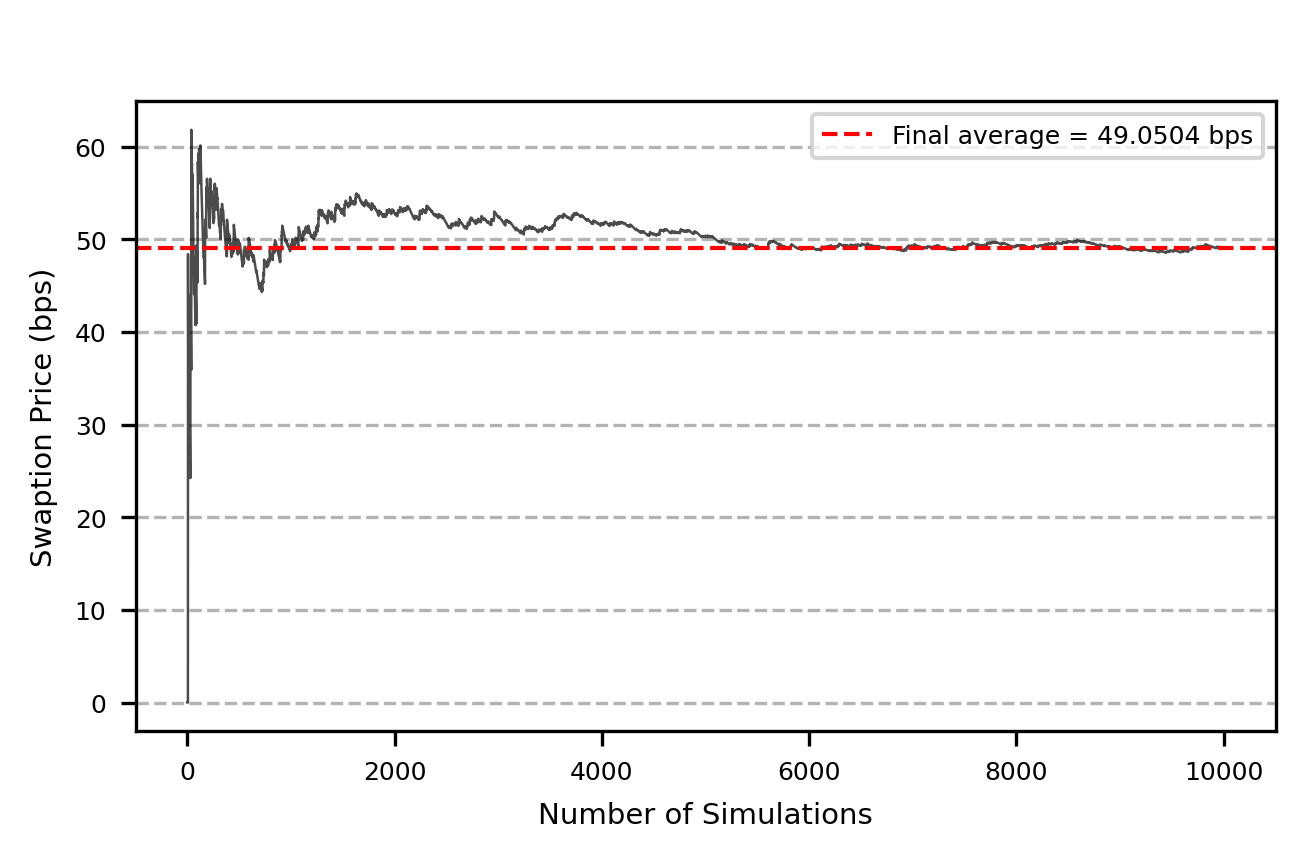

In [ ]:
if 'detailed' in convergence_track:
    fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
    fig.suptitle(" ", fontsize=9)
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
    ax = fig.add_subplot(gs[0, 0])
    sim_indices = np.arange(1, convergence_track['M'] + 1)
    ax.plot(sim_indices, convergence_track['detailed'], color='black', linewidth=0.6, alpha=0.7)
    ax.axhline(y=prices_vs_M[-1], color='red', linestyle='--', linewidth=1, label='Final average = {:.4f} bps'.format(prices_vs_M[-1]))
    ax.set_xlabel('Number of Simulations', fontsize=7)
    ax.set_ylabel('Swaption Price (bps)', fontsize=7)
    ax.tick_params(labelsize=6)
    ax.grid(axis='y', which='major', color=(0.7, 0.7, 0.7, 0), linestyle='--')
    ax.legend(fontsize=6, loc='best')
    fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/3c_running_average.pdf")
    plt.show()




Problem 3d - LIBOR Market Model: Swaption Pricing
Pricing 3Y7Y payer swaptions with M=5000 simulations
Strike offset (bps)  Strike      Price LMM (bps)  Price HWEV (bps)
    -100         0.053760    188.1660         472.6131
     -75         0.056260    139.2780         356.6389
     -50         0.058760    101.0743         246.5361
     -25         0.061260     71.8647         150.5071
       0         0.063760     50.4037          77.9826
      25         0.066260     34.5338          33.0631
      50         0.068760     23.5444          11.1417
      75         0.071260     15.9960           2.9230
     100         0.073760     10.4191           0.5891


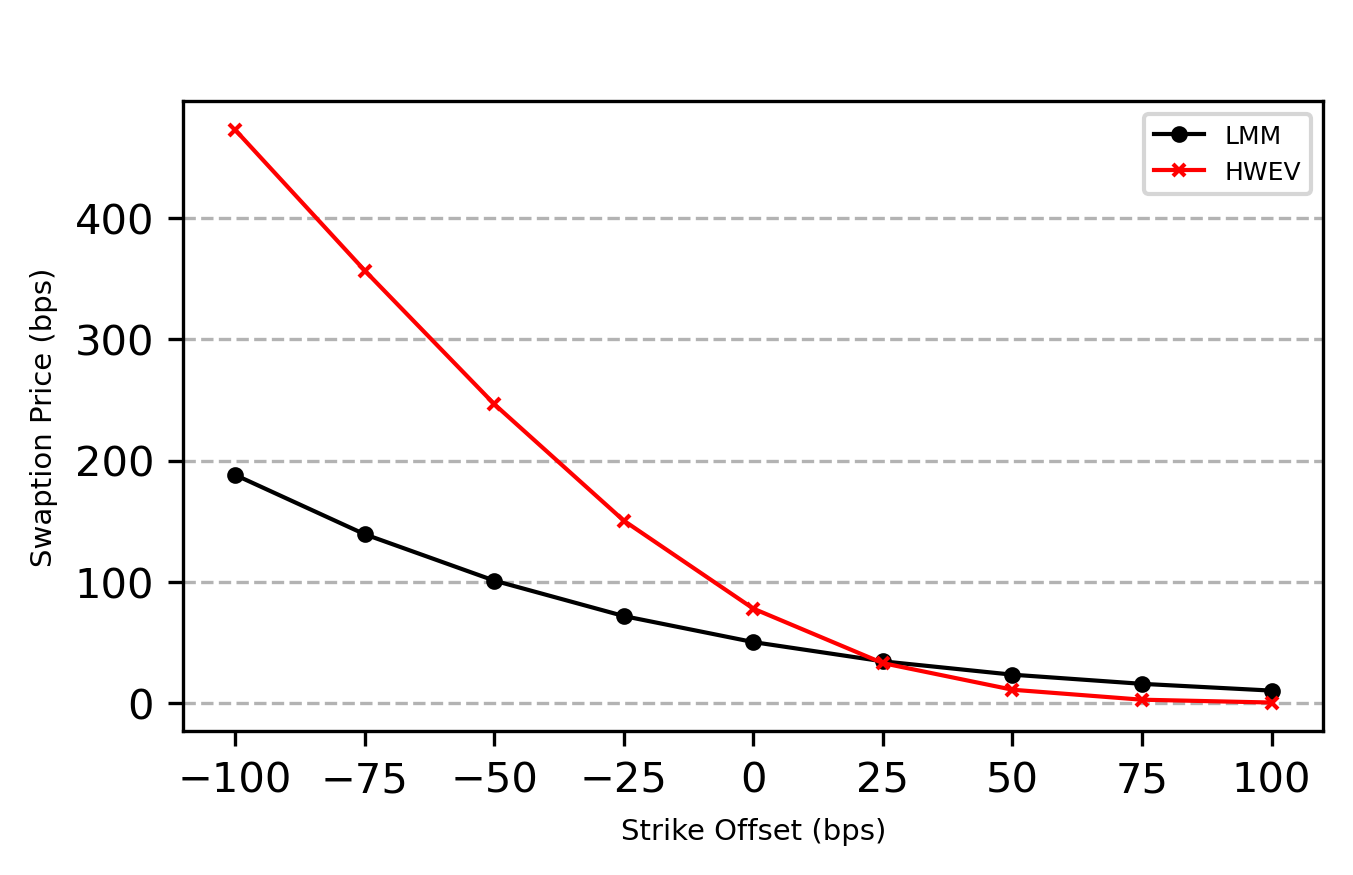

In [402]:
##########################################################
#######################PROBLEM 3d#########################
##########################################################
M_final = 5000
N_strikes = len(strike_offsets)
price_swaption_lmm = np.zeros(N_strikes)

print("\n" + "="*60)
print("Problem 3d - LIBOR Market Model: Swaption Pricing")
print("="*60)
print(f"Pricing 3Y7Y payer swaptions with M={M_final} simulations")
print(f"Strike offset (bps)  Strike      Price LMM (bps)  Price HWEV (bps)")

for idx in range(N_strikes):
    K = K_swaption[idx]
    chi_disc = np.zeros(M_final)
    
    for n in range(M_final):
        L_simul = fid.simul_lmm(L_forward_1Y[2:N_lmm+1], T_lmm[1:N_lmm+1], sigma_market_lmm[2:], Omega, Mps, method_sigma="step_wise_constant_reverse", T_simul=T_n, seed=n)
        
        T_swap_forward = np.array([i*alpha for i in range(0, int((T_N-T_n)/alpha)+1)])
        p_swap_forward = np.ones(len(T_swap_forward))
        for j in range(len(T_swap_forward)-1):
            p_swap_forward[j+1] = p_swap_forward[j] / (1 + alpha * L_simul[int(T_n/alpha)-1+j, -1])
        
        R_swap_forward, S_swap_forward = fid.swap_rate_from_zcb_prices(0, 0, T_N-T_n, "annual", T_swap_forward, p_swap_forward)
        
        payoff = S_swap_forward * max(R_swap_forward - K, 0)
        chi_disc[n] = payoff * (p_1Y[T_N] / p_swap_forward[-1])
    
    price_swaption_lmm[idx] = np.mean(chi_disc)
    print(f"{10000*strike_offsets[idx]:8.0f}         {K:.6f}    {10000*price_swaption_lmm[idx]:8.4f}         {10000*price_swaption_hwev[idx]:8.4f}")

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(" ", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
ax = fig.add_subplot(gs[0,0])
ax.set_xlabel("Strike Offset (bps)", fontsize=7)
ax.set_ylabel("Swaption Price (bps)", fontsize=7)
plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7), linestyle='--')
p1 = ax.plot(10000*strike_offsets, 10000*price_swaption_lmm, color='black', marker='o', markersize=3, linewidth=1, label="LMM")
p2 = ax.plot(10000*strike_offsets, 10000*price_swaption_hwev, color='red', marker='x', markersize=3, linewidth=1, label="HWEV")
ax.legend(loc="best", fontsize=6)
fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/3d_swaption_prices.pdf")
plt.show()




Problem 3e - LIBOR Market Model: Black Implied Volatilities
Strike offset (bps)  Strike      Price (bps)  Black IV
    -100         0.053760    188.1660   nan
     -75         0.056260    139.2780   nan
     -50         0.058760    101.0743   nan
     -25         0.061260     71.8647   nan
       0         0.063760     50.4037   0.024231
      25         0.066260     34.5338   0.037774
      50         0.068760     23.5444   0.046466
      75         0.071260     15.9960   0.052997
     100         0.073760     10.4191   0.057692


/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/Fixed_Income_Exam/04_Exams/fixed_income_derivatives_E2025.py:1268: RuntimeWarning: divide by zero encountered in scalar divide
  iv += diff/vega


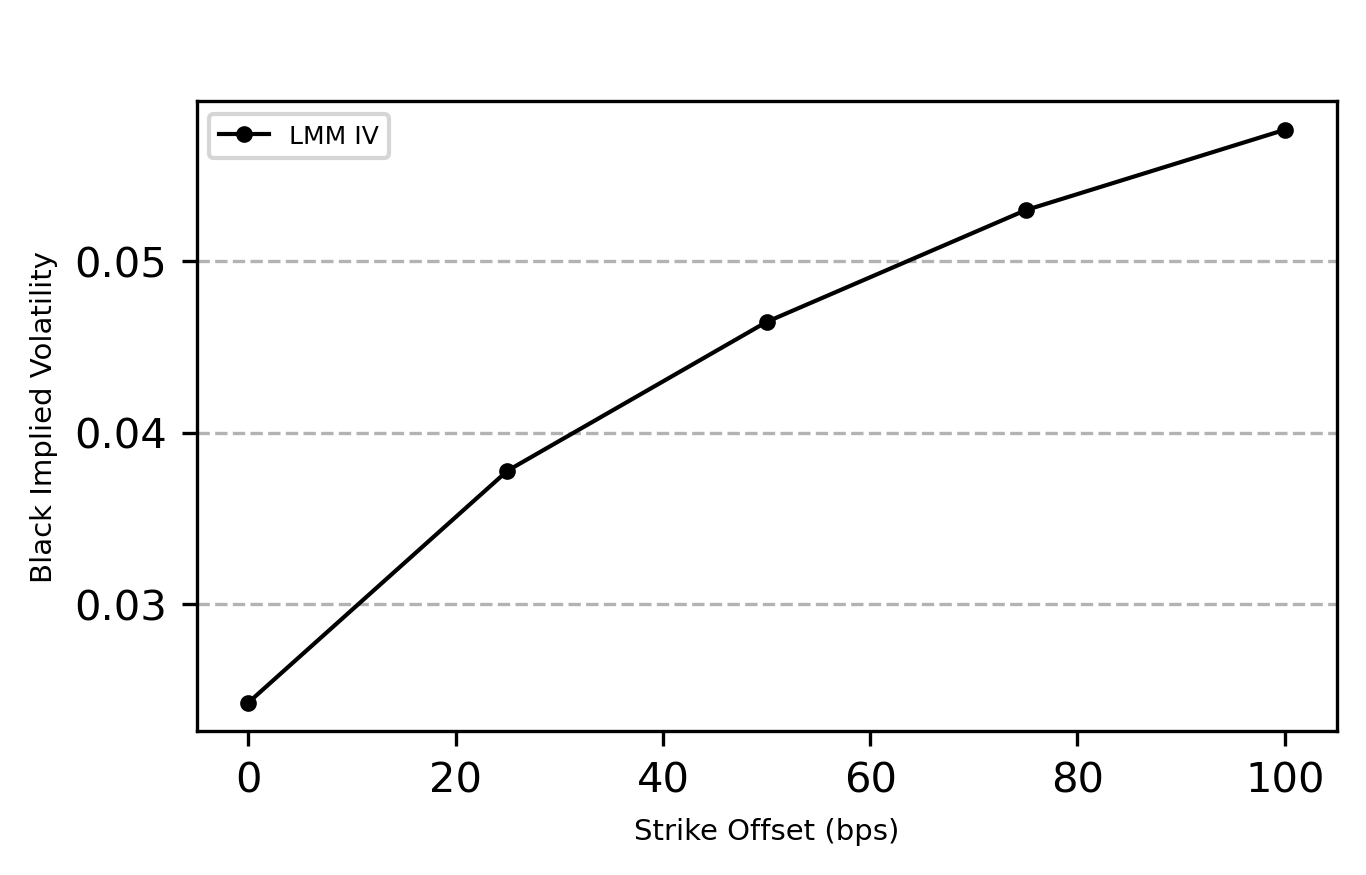

In [403]:
##########################################################
#######################PROBLEM 3e#########################
##########################################################

iv_swaption_lmm = np.zeros(N_strikes)
iv_computed = np.zeros(N_strikes, dtype=bool)

print("\n" + "="*60)
print("Problem 3e - LIBOR Market Model: Black Implied Volatilities")
print("="*60)
print(f"Strike offset (bps)  Strike      Price (bps)  Black IV")

for i in range(N_strikes):
    try:
        iv_swaption_lmm[i] = fid.black_swaption_iv(price_swaption_lmm[i], T_n, K_swaption[i], S_swap_3Y7Y, F_swap_3Y7Y, type_option="call", prec=1e-10)
        iv_computed[i] = True
        print(f"{10000*strike_offsets[i]:8.0f}         {K_swaption[i]:.6f}    {10000*price_swaption_lmm[i]:8.4f}   {iv_swaption_lmm[i]:.6f}")
    except:
        iv_computed[i] = False
        print(f"{10000*strike_offsets[i]:8.0f}         {K_swaption[i]:.6f}    {10000*price_swaption_lmm[i]:8.4f}   FAILED")

strike_offsets_valid = strike_offsets[iv_computed]
iv_lmm_valid = iv_swaption_lmm[iv_computed]

if np.sum(iv_computed) > 0:
    fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
    fig.suptitle(" ", fontsize=9)
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90)
    ax = fig.add_subplot(gs[0,0])
    ax.set_xlabel("Strike Offset (bps)", fontsize=7)
    ax.set_ylabel("Black Implied Volatility", fontsize=7)
    plt.grid(axis='y', which='major', color=(0.7, 0.7, 0.7), linestyle='--')
    ax.plot(10000*strike_offsets_valid, iv_lmm_valid, color='black', marker='o', markersize=3, linewidth=1, label="LMM IV")
    ax.legend(loc="best", fontsize=6)
    fig.savefig("/Users/PC/Documents/Dokumenter – Olivia's Macbook/9. Semester/Fixed Income/FixedIncomeCO/PLOTS/3e_lmm_iv.pdf")
    plt.show()
else:
    print("No valid implied volatilities could be computed")